# Fakultät für Physik

## Physikalisches Praktikum P2 für Studierende der Physik

Versuch P2-63, 64, 65 (Stand: April 2024)

[Raum F1-08](https://labs.physik.kit.edu/img/Praktikum/Lageplan_P2.png)



# Photoeffekt

Name: Vrkic Vorname: Tin E-Mail: uyvpq@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
\end{split}
\end{equation*}

Name: Nock Vorname: Mika E-Mail: uttzi@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Gruppennummer: Mo-32

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}


Betreuer: Denis Benâtre

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Versuch durchgeführt am: 27.05.24

---

**Beanstandungen zu Protokoll Version _____:**

\begin{equation*}
\begin{split}
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
\end{split}
%\text{\vspace{10cm}}
\end{equation*}

<br>
Testiert am: __________________ Testat: __________________

In [1]:
# importieren aller benötigten Module
import matplotlib.pyplot as plt 
import numpy as np 
import kafe2
import pathlib
import pandas as pd
from uncertainties import ufloat
from uncertainties import unumpy as unp

# erstellen einer Funktion für kafe2 Fits
def fit_funktion(xy_data, model_function, xy_error, xy_label, title, constraint=[], add_error=True):
    xy_data = kafe2.XYContainer(xy_data[0], xy_data[1])
    xy_data.label = title
    fit = kafe2.XYFit(xy_data = xy_data, model_function = model_function)
    if add_error:
        fit.add_error(axis = 'x', err_val = xy_error[0])
        fit.add_error(axis = 'y', err_val = xy_error[1])
    for i in range(len(constraint)):
        fit.add_parameter_constraint(name = constraint[i][0], value = constraint[i][1], uncertainty = constraint[i][2])
    fit.do_fit()
    plot = kafe2.Plot(fit)
    plot.x_label, plot.y_label = xy_label[0], xy_label[1]
    
    return fit.parameter_values, fit.parameter_errors, plot

e = 1.602176634 * 10**(-19) # elemental charge in Coulomd
c = 2.99792458 * 10**8 # speed of light in meters/second

## Aufgabe 1: Grundlagen

**Hinweise zu Aufgabe 1 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Photoeffekt/doc/Hinweise-Versuchsdurchfuehrung.md).**

 * Machen Sie sich mit dem zu untersuchenden Effekt und der Art, wie Sie ihn beobachten und messen werden vertraut. 
 * Bearbeiten Sie hierzu die folgenden Aufgaben.

### Aufgabe 1.1: Qualitative Beobachtung des äußeren photoelektrischen Effekts

Beobachten Sie den äußeren Photoeffekt mit Hilfe des bereitstehenden statischen Elektrometers (E), der $\mathrm{Zn}$-Platte (Zn) und der $\mathrm{Hg}$-Dampflampe (Hg) qualitativ. Gehen Sie dabei wie folgt vor: 

 * Laden Sie Zn negativ auf und beobachten Sie E ohne Zn mit Hg zu bestrahlen. 
 * Laden Sie Zn negativ auf und beobachten Sie E, wenn Sie Zn mit Hg bestrahlen.
 * Laden Sie Zn negativ auf und beobachten Sie E, wenn Sie Zn mit Hg bestrahlen und zusätzlich eine positiv geladene Elektrode in die Nähe von Zn bringen.
 * Laden Sie Zn positiv auf und beobachten Sie E, wenn Sie Zn mit Hg bestrahlen.

Beschreiben und erklären Sie Ihre Beobachtungen. 

---

After charging up the electrometer, the following things happen in the cases mentioned above

- With a negatively charged plate, the electrons leak a little into the environment (for example in coronal discharges) and the electrometer discharges very slowly over time. The half-life was so high we couldn't measure it appropriately. 
- With a irradiation, the electrometer discharged faster, with a half-life of about $2\,min$. That is the case because electrons will be knocked out of the plate by the incoming photons and more of them can escape into the environment. 
- Approaching the plate with a positively charged electrode makes the electrometer discharge much faster again because the electrons that get knocked out by the photons are attracted by the electrode and don't form a charged cloud. The half-life in this case was about $20\,s$.
- When the electrometer is positively charged, it isn't affected by the incoming photons. That's because there are no more electrons that can be knocked out by the photons and the charge is held. 

---

### Aufgabe 1.2: Charakterisierung des für die folgenden Aufgaben zu verwendenden Elektrometers

 * Nehmen Sie einen Nullabgleich des für **Aufgabe 2** zu verwendenden Elektrometers vor. 
 * Bestimmen Sie den Innenwiderstand $R_{i}$ des Elektrometers mit Hilfe der vorhandenen Vorwiderstände von $R_{V}=0.01,\, 0.1,\, 1$ und $10\,\mathrm{G\Omega}$. 

---

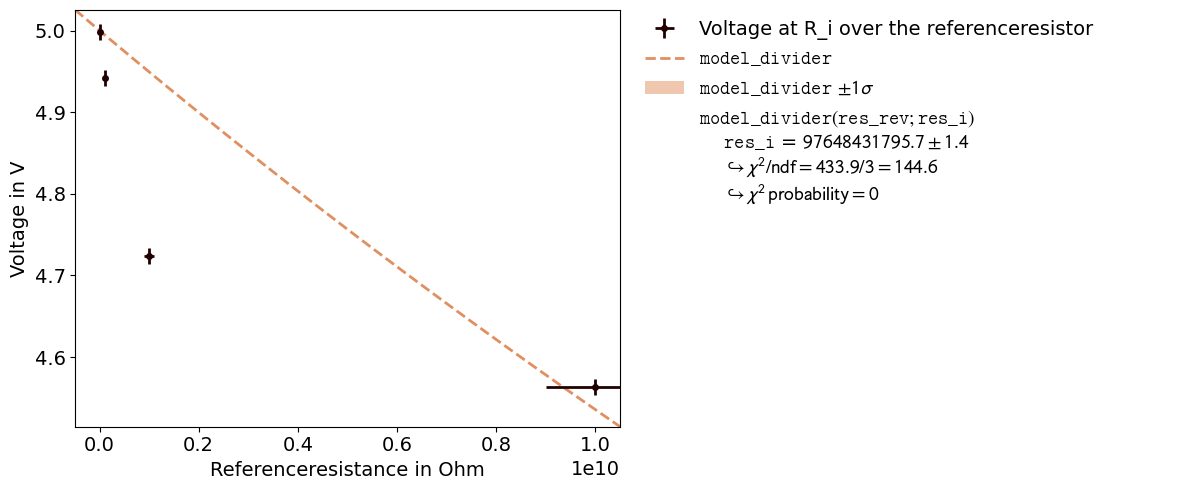

In [2]:
def model_divider(res_rev,res_i):
    return U_0 * res_i / (res_rev+res_i)

res_rev = np.array([10,100,1000,10000]) * 10**6 #in Ohm
U_e = np.array([4.998,4.942,4.724,4.563])
U_0 = 5

xy_data = kafe2.XYContainer(res_rev,U_e)
xy_data.label = 'Voltage at R_i over the referenceresistor'
fit = kafe2.XYFit(xy_data = xy_data, model_function = model_divider)
fit.add_error('x', err_val = 0.1, relative = True)
fit.add_error('y', err_val = 0.01)
fit.do_fit()

plot = kafe2.Plot(fit)
plot.x_label = "Referenceresistance in Ohm"
plot.y_label = "Voltage in V"
plot.plot()
plt.show()

The elctrometer was adjusted to zero for an amplification of $10^2$. The main problem were fluctuations that were hard to control and the fact that an adjustment for values over $10^2$ didn't hold when the amplifier was turned back down to lower amplifications. Instead it showed values of around $4\,V$.

The inner resistance of the mesuring device was determined with a voltage divider. Some known resistors were plugged in series to the inner resistance and the voltagedrop across the inner resistor was mesured. With a fit, the final result can then be obtained. In this case, the model used was $U_e = U_0 \cdot \frac{R_i}{R_{rev} + R_i}$ which follows from Kirchhoff's laws.

The Resistance is calculated to $R_i = 1.54 \cdot 10^{10}\Omega$, which is about three orders of magnitude different from the actual value $R_i \geq 10^{13}$ written on the electrometer. It can't be said why this error occurs. It is enough, though, to say that the inner resistance is very high, which is the important aspect.

---

## Aufgabe 2: Bestimmung von $h$

**Hinweise zu Aufgabe 1 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Photoeffekt/doc/Hinweise-Versuchsdurchfuehrung.md).**

 - Bestimmen Sie $h$ aus dem äußeren photoelektrischen Effekt mit Hilfe von zwei verschiedenen Schaltungen. 
 - Bearbeiten Sie hierzu die folgenden Aufgaben.

### Aufgabe 2.1: Spannung $U_{\mathrm{Ph}}$ der Photozelle bei variierender Lichtfrequenz

 * Tragen Sie die sich von selbst einstellende maximale Spannung $U_{\mathrm{Ph}}$ der Photozelle bei Bestrahlung mit Licht der Wellenlängen $\lambda_{\mathrm{CWL}}^{(i)}$ bei maximaler Lichtintensivität auf. 
 * Verwenden Sie die folgenden sechs Wellenlängen der zur Verfügung stehenden Filter: $\lambda_{\mathrm{CWL}}^{(i)} = 360,\,400,\,440,\,490,\,540,\,590\,\mathrm{nm}$.
 * Bestimmen Sie $h$ durch Anpassung eines geeigneten Modells.

---

In [3]:
# our own measured data
U_1 = np.array([0.794,0.765,0.708,0.633,0.569,0.472])
U_2 = np.array([0.793,0.765,0.709,0.633,0.568,0.473])
U_3 = np.array([0.793,0.764,0.709,0.634,0.569,0.472])
U_4 = np.array([0.794,0.765,0.709,0.634,0.570,0.472])

lam = np.array([360,400,440,490,540,590]) *10**(-9)

n1 = np.array([ U_1[0] , U_2[0] , U_3[0] , U_4[0]])
n2 = np.array([ U_1[1] , U_2[1] , U_3[1] , U_4[1]])
n3 = np.array([ U_1[2] , U_2[2] , U_3[2] , U_4[2]])
n4 = np.array([ U_1[3] , U_2[3] , U_3[3] , U_4[3]])
n5 = np.array([ U_1[4] , U_2[4] , U_3[4] , U_4[4]])
n6 = np.array([ U_1[5] , U_2[5] , U_3[5] , U_4[5]])

lam_std = 10**(-8) / (2 * np.sqrt(2 * np.log(2)))

U_bar = [np.mean(n1),np.mean(n2),np.mean(n3),np.mean(n4),np.mean(n5),np.mean(n6)]
U_bar_std = [np.std(n1),np.std(n2),np.std(n3),np.std(n4),np.std(n5),np.std(n6)]

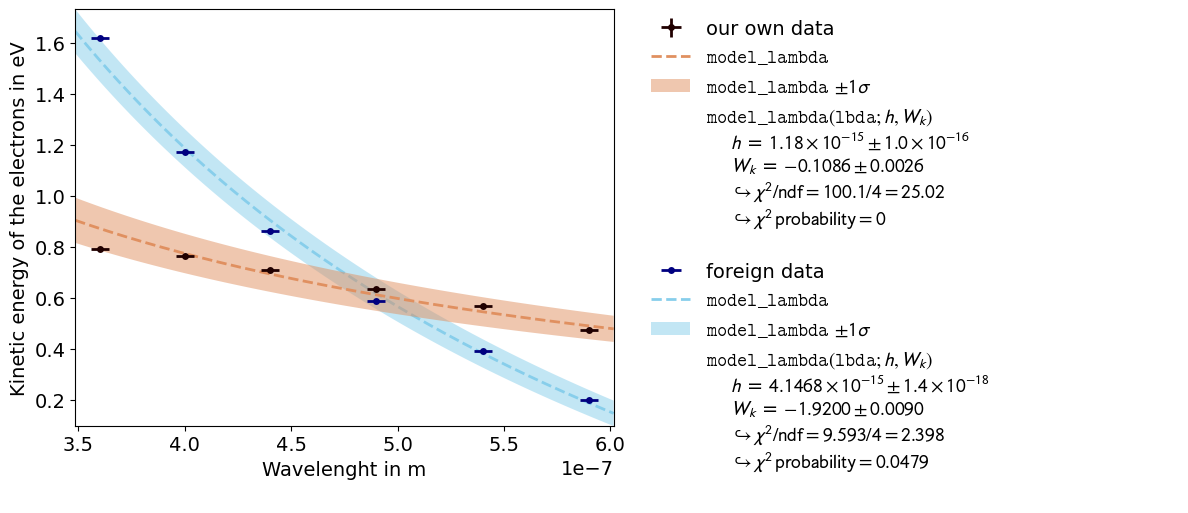

In [24]:
def model_lambda(lbda, h=4*10**-15, W_k=-2):
    return c*h/lbda + W_k

# data obtained by others
for_data = np.array([[1.618, 1.619, 1.6199], [1.1747, 1.1746, 1.1745], [0.865,0.864, 0.8622], [0.5873, 0.5872, 0.5874], [0.3920, 0.3926, 0.3919], [0.1983,0.1978, 0.1982]])
for_U_bar = unp.nominal_values(unp.uarray(np.mean(for_data, axis=1), np.std(for_data, axis=1, ddof=1)))

xy_data = kafe2.XYContainer(lam,U_bar)
xy_data.label = 'our own data'
xy_data.axis_labels = ('Wavelenght in m', 'Kinetic energy of the electrons in eV')
for_xy_data = kafe2.XYContainer(lam,for_U_bar)
for_xy_data.label = 'foreign data'
for_xy_data.axis_labels = xy_data.axis_labels

fit = kafe2.XYFit(xy_data,model_lambda)
fit.add_error('x',err_val=lam_std)
fit.add_error('y',err_val=U_bar_std)
fit.do_fit()

for_fit = kafe2.XYFit(for_xy_data,model_lambda)
for_fit.add_error('x',err_val=lam_std)
for_fit.do_fit()

plot=kafe2.Plot([fit,for_fit])
plot.plot()
plt.show()

In this task, $h$ was calculated by shining light of different wavelenghts on the photocathode. This leads to a Voltage which can be measured and equals the kinetic energy of the electrons freed from the cathode in eV. 

With the Fit above it can easily be seen, that a mistake was made while measuring our own data. The exact thing that was done wrong isn't clear and it is assumed to have something to do with the resistor plugged to the electrometer. Because of that, the task is solved with the values obtained by a different group and the Fit talked about, will be the blue one in the diagramm above.

From the relation $E_e = h\nu + W_k$ it follows, that $E_e = \frac{hc}{\lambda} + W_k$ which is the model fitted to the datapoints. On the Voltages, there is no known uncertainty, whilst the filters, by which the wavelenghts are controlled, have some error. For them, it is known, that $FWHM = \pm 10nm$ which translates to $\sigma = \frac{FWHM}{2\sqrt(2ln2)}$. The Fit itself is acceptable for the small uncertainties on the values.

In the end, the values obtained are:
$$h = 4.1468 \pm 0.0014 * 10^{-15} eVs$$ 
$$W_k = 1.920 \pm 0.009 eV$$

---

### Aufgabe 2.2: Photostrom $I_{\mathrm{Ph}}$ als Funktion einer angelegten externen Spannung $U_{o}$ bei variierender Lichtintensität

 - Tragen Sie für $\lambda_{\mathrm{CWL}}=400\,\mathrm{nm}$ den Photostrom $I_{\mathrm{Ph}}$ als Funktion einer angelegten externen Spannung $U_{o}$ auf.
 - Bestimmen Sie durch Anpassung eines geeigneten Modells den Wert von $U(I_{\mathrm{Ph}}=0)$ im Nahbereich des Nulldurchgangs. 
 - Folgen Sie den vorgenannten Punkten einmal für die maximale und einmal für eine bei mittels eines Graufilters reduzierte Lichtintensität. 
 - Bestimmen Sie die Abnahme der Lichtintensität durch den Filter.

---

Here, we plot the photocurrent over the voltage $U_E$ with and without the gray filter. For the photocurrent we use the following formula: $I_{Ph}=\frac{U_E}{R}$, where the amplification has already been absorbed into the measurement of $U_E$.

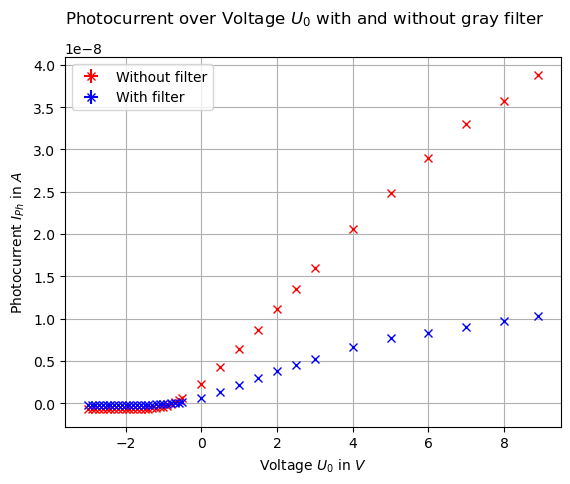

In [ ]:
# in V, without gray filter
U_e_high = np.array([-0.068,-0.068,-0.068,-0.068,-0.068,-0.068,-0.068,-0.068,-0.068,-0.068,-0.068,-0.067,-0.067,-0.067,
                    -0.066,-0.065,-0.064,-0.061,-0.057,-0.049,-0.039,-0.026,-0.008,0.0113,0.034,0.061,
                    0.225,0.432,0.639,0.866,1.111,1.353,1.597,
                    2.060,2.490,2.905,3.300,3.570,3.883])
# in V, with gray filter
U_e_low = np.array([-0.014,-0.014,-0.014,-0.014,-0.014,-0.014,-0.014,-0.014,-0.014,-0.014,-0.014,-0.014,-0.014,-0.014,
                    -0.014,-0.014,-0.014,-0.014,-0.013,-0.011,-0.009,-0.006,-0.002,0.002,0.008,0.015,
                    0.067,0.133,0.213,0.300,0.383,0.457,0.526,
                    0.660,0.770,0.837,0.901,0.971,1.030]) #in V
U_0 = np.array([-3,-2.9,-2.8,-2.7,-2.6,-2.5,-2.4,-2.3,-2.2,-2.1,-2,-1.9,-1.8,-1.7,-1.6,-1.5,-1.4,-1.3,-1.2,-1.1,-1.,-0.9,-0.8,-0.7,-0.6,-0.5,
                    0.,0.5,1.,1.5,2.,2.5,3,
                    4.,5.,6.,7.,8.,8.89]) #in V
U_std = 0.01
R = 100 * 10**6


fig, ax = plt.subplots()
ax.errorbar(U_0, U_e_high/R, xerr=U_std, yerr=U_std/R, fmt="rx", label="Without filter")
ax.errorbar(U_0, U_e_low/R, xerr=U_std, yerr=U_std/R, fmt="bx", label="With filter")
fig.suptitle("Photocurrent over Voltage $U_0$ with and without gray filter")
ax.set(xlabel="Voltage $U_0$ in $V$", ylabel="Photocurrent $I_{Ph}$ in $A$")
ax.grid(), ax.legend()
plt.show()

As the blue graph is only linear between $U_0=0\,V$ and $U_0=4\,V$, we'll only use those values for both fits. The model function will be $$I_{Ph}=a\cdot U_0+I_0$$, where $[a]=1/\Omega$ and $[I_0]=A$

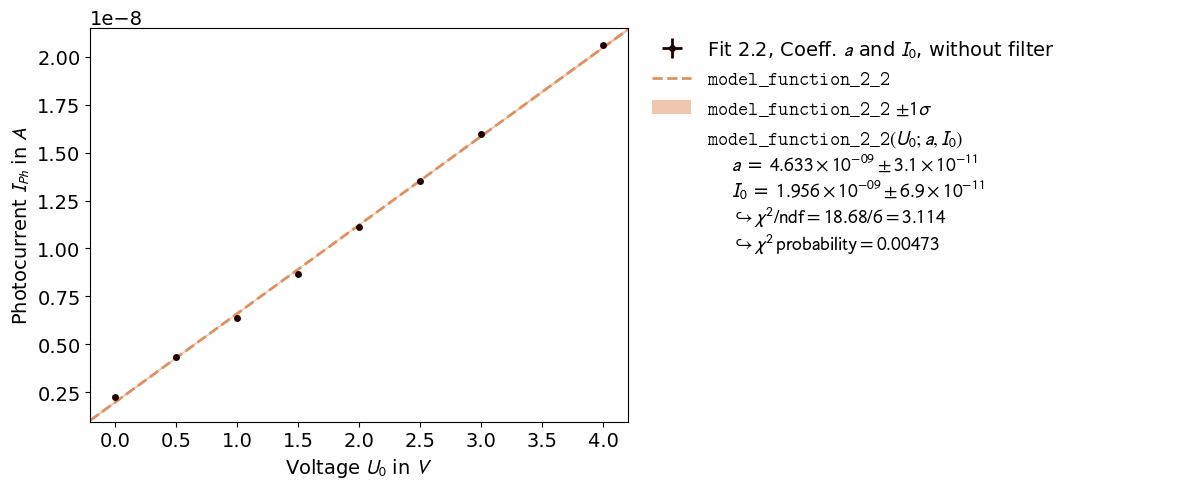

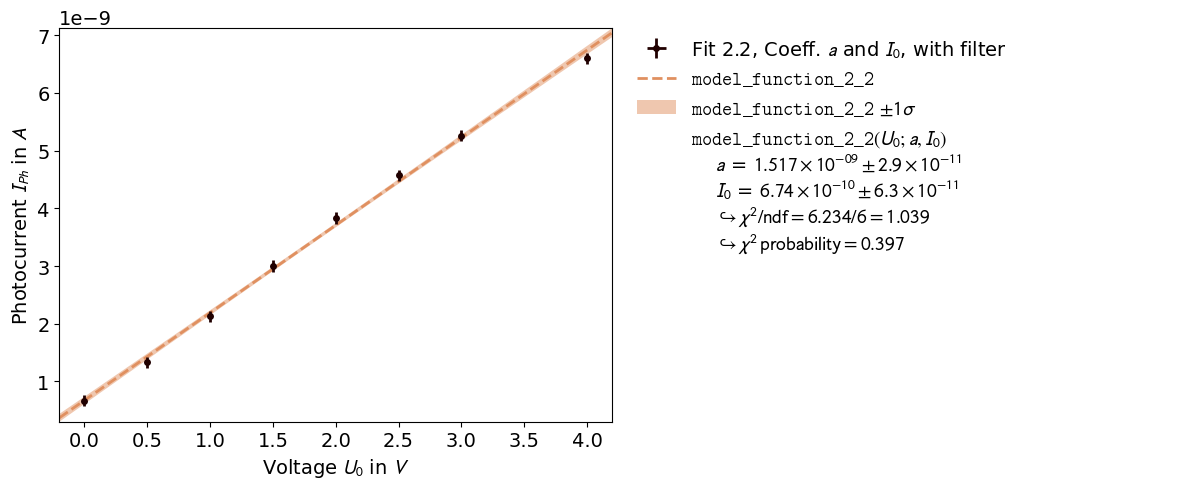

Coefficients a, without and with filter, respectively:
a=(4.633 +/- .031) * 10^(-9) 1/Ohm
a=(1.517 +/- .029) * 10^(-9) 1/Ohm

Coefficients $I_0$, without and with filter, respectively:
I0=(1.956 +/- .069) * 10^(-9) Ampere
a=(0.674 +/- .063) * 10^(-9) Ampere


In [ ]:
def model_function_2_2(U_0, a=10**(-9), I_0=10**(-10)):
    return a * U_0 + I_0

data_2_2_high = np.array([ U_0[26:34] , U_e_high[26:34]/R ])
data_2_2_low = np.array([ U_0[26:34] , U_e_low[26:34]/R ])
error_2_2 = np.array([ U_std , U_std/R ])
label_2_2 = [ "Voltage $U_0$ in $V$" , "Photocurrent $I_{Ph}$ in $A$" ]
title_2_2_high = "Fit 2.2, Coeff. $a$ and $I_0$, without filter"
title_2_2_low = "Fit 2.2, Coeff. $a$ and $I_0$, with filter"

fit_2_2_high_res = fit_funktion(data_2_2_high, model_function_2_2, error_2_2, label_2_2, title_2_2_high)
fit_2_2_low_res = fit_funktion(data_2_2_low, model_function_2_2, error_2_2, label_2_2, title_2_2_low)

fit_2_2_high_res[2].plot()
fit_2_2_low_res[2].plot()
fit_2_2_high_res[2].show()
fit_2_2_low_res[2].show()

print(f"Coefficients a, without and with filter, respectively:")
print(f"a=(4.633 +/- .031) * 10^(-9) 1/Ohm")
print(f"a=(1.517 +/- .029) * 10^(-9) 1/Ohm\n")
print(f"Coefficients $I_0$, without and with filter, respectively:")
print(f"I0=(1.956 +/- .069) * 10^(-9) Ampere")
print(f"a=(0.674 +/- .063) * 10^(-9) Ampere")

For once, our fits do yield nice results. While the $\chi^2$ probability of the fit without filter is very low, the second fit's probability is very good. The reason the first is so low, though, is that the errors of the measurements are the same for both fits, but the actual values of the first fit are larger by one order of magnitude, so the relative errors turn out much lower and thus the fit doesn't have much space for adjusting the parameters. So, the results and goodness of fit:  
- Without filter are:  
  - $a=(4.633\pm 0.031)\,\frac{1}{G\Omega}$  
  - $I_0=(1.956\pm 0.069)\,nA$  
  - $\chi^2 probability=0.00473$  
- With filter are:  
  - $a=(1.517\pm 0.029)\,\frac{1}{G\Omega}$  
  - $I_0=(0.674\pm 0.063)\,nA$  
  - $\chi^2 probability=0.397$  

Using these results and the model function we started with we can calculate the voltage $U_0$ for which the Photocurrent falls to $0$. Equating $I_{Ph}$ with $0$ and rearranging the formula, we get $U_0(I_{Ph}=0)=-\frac{I_0}{a}$. The resulting error on $U_0(I_{Ph})$ we can get from propagation of uncertainty.

In [ ]:
# Without filter
a = fit_2_2_high_res[0][0]
a_std = fit_2_2_high_res[1][0]
I_0 = fit_2_2_high_res[0][1]
I_0_std = fit_2_2_high_res[1][1]
U_0_I_Ph0 = - I_0 / a
U_0_I_Ph0_std = np.sqrt( I_0_std**2 + (I_0**2 * (a_std**2) / a**2) ) / a

# With filter
a_filter = fit_2_2_low_res[0][0]
a_filter_std = fit_2_2_low_res[1][0]
I_0_filter = fit_2_2_low_res[0][1]
I_0_filter_std = fit_2_2_low_res[1][1]
U_0_I_Ph0_filter = - I_0_filter / a_filter
U_0_I_Ph0_filter_std = np.sqrt( I_0_filter_std**2 + (I_0_filter**2 * (a_filter_std**2) / a_filter**2) ) / a_filter

print(f"Without filter: U_0(I_Ph=0)=({U_0_I_Ph0:.3f} +/- {U_0_I_Ph0_std:.3f})V")
print(f"With filter: U_0(I_Ph=0)=({U_0_I_Ph0_filter:.3f} +/- {U_0_I_Ph0_filter_std:.3f})V")

Without filter: U_0(I_Ph=0)=(-0.422 +/- 0.015)V
With filter: U_0(I_Ph=0)=(-0.444 +/- 0.042)V


So, the voltage that completely stops the photocurrent without and with filter is:  
- $U_0(I_{Ph}=0)=(-0.422\pm 0.015)\,V$ without filter  
- $U_0(I_{Ph}=0)=(-0.444\pm 0.042)\,V$ with filter  


Lastly, we plot the ratio $I_{Ph}^{Filter}/I_{Ph}$:

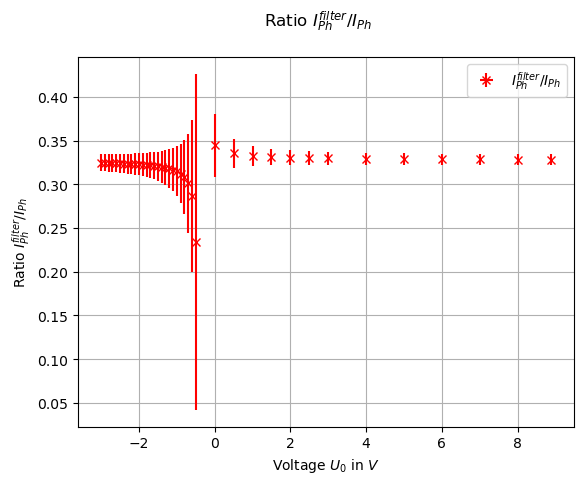

In [ ]:
I_Ph = a * U_0 + I_0
I_Ph_std = np.sqrt( (U_0 * a_std)**2 + (a * U_std)**2 + (I_0_std)**2 )
I_Ph_filter = a_filter * U_0 + I_0_filter
I_Ph_filter_std = np.sqrt( (U_0 * a_filter_std)**2 + (a_filter * U_std)**2 + (I_0_filter_std)**2 )

fig2, ax2 = plt.subplots()
ax2.errorbar(U_0, I_Ph_filter/I_Ph, xerr=U_std, yerr= np.sqrt( I_Ph_filter_std**2 + (I_Ph_filter*I_Ph_std/I_Ph)**2 )/np.absolute(I_Ph), fmt="rx", label="$I_{Ph}^{filter}/I_{Ph}$")
fig2.suptitle("Ratio $I_{Ph}^{filter}/I_{Ph}$")
ax2.set(xlabel="Voltage $U_0$ in $V$", ylabel="Ratio $I_{Ph}^{filter}/I_{Ph}$")
ax2.grid(), ax2.legend()
plt.show()

In this plot we can nicely see how, for most voltages, the ratio is independent of the voltage and, more importantly, the filtered light has an intensity of about a third of the unfiltered light, because for voltages lower than about $-2\,V$ and higher than about $1\,V$ the graph is horizontal. Only when the value of $U_0(I_{Ph}=0)$ is approached, the ratio diverges to negative infinity from the left and positive infinity from the right. So the filter reduces the intensity of the light by about two thirds.

### Aufgabe 2.3: Spannung $U_{o}(I_{\mathrm{Ph}}=0)$ bei variierender Lichtfrequenz

 * Bestimmen Sie für die in **Aufgabe 2.1** verwendeten Wellenlängen $\lambda^{(i)}_{\mathrm{CWL}}$ jeweils die Spannung $U^{(i)}(I_{\mathrm{}Ph}=0)$. 
 * Bestimmen Sie $h$ durch Anpassung eines geeigneten Modells und vergleichen Sie mit dem Ergebnis aus **Aufgabe 2.1**.
 
---

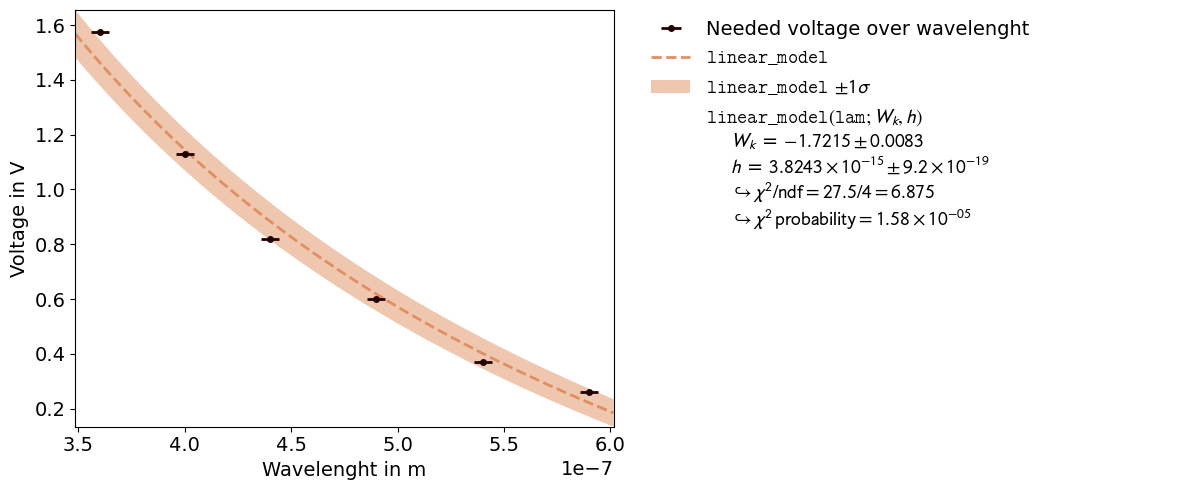

In [23]:
def linear_model(lam,W_k=1,h=10**-15):
    return c/lam*h + W_k

U_0_2_3 = np.array([1.575, 1.13, 0.82, 0.60, 0.37, 0.26]) # in V

data_2_3 = np.array([ lam , U_0_2_3])
error_2_3 = np.array([ lam_std , 0])
label_2_3 = [ "Wavelenght in m" , "Voltage in V" ]
title_2_3 = "Needed voltage over wavelenght"
fit_2_3_res = fit_funktion(data_2_3, linear_model, error_2_3, label_2_3, title_2_3)
fit_2_3_res[2].plot()
fit_2_3_res[2].show()

In this part of the experiment we also want to obtain a value for $h$, but with a slightly different method. Instead of measuring the Voltage directly, the Current is measured and a second Voltagesource is attached. Now one can regulate this second source, so that it excatly opposes the field generated by the freed electrons which leads to no Current. 

This data is again fitted with the same model as in task 2.1, and is also given the same errors. The Fit isn't very acceptable, but the error by which that occurs isn't known. It could have something to do with a systematic mistake, that was also done in 2.1. 

In the end, the values obtained are:
$$h = 3.8243 \pm 0.0009 * 10^{-15} eVs$$
$$W_k = 1.7215 \pm 0.0083 eV$$

In [26]:
h_exp = 4.135 * 10**-15
h_21 = 4.147 * 10**-15
h_23 = 3.824 * 10**-15

print(f'ratio between h in literature and in task 2.1: {h_exp/h_21}')
print(f'ratio between h in literature and in task 2.3: {h_exp/h_23}')
print(f'ratio between h in task 2.1 and in task 2.3: {h_21/h_23}')

ratio between h in literature and in task 2.1: 0.9971063419339281
ratio between h in literature and in task 2.3: 1.0813284518828454
ratio between h in task 2.1 and in task 2.3: 1.084466527196653


Now, the values for $h$ can be compared with one another and the literature. The ratios are calculated to:
$$ \frac{h_{lit}}{h_{2.1}} = 0.997, \frac{h_{lit}}{h_{2.3}} = 1.081, \frac{h_{2.1}}{h_{2.3}} = 1.084$$

The values from 2.1 and 2.3 deviate by a factor of $1.084$, whilst 2.1 delivers the more exact value, deviating from literature only by a factor of $0.997$. This is maybe due to some problems nulling the electrometer or the fact, that lesser measurements were taken. 

---